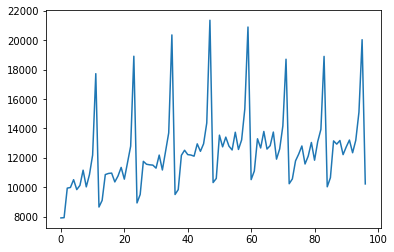

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

datos = pd.read_csv('session7Data.csv', sep=";",decimal=",")
y = datos.iloc[:,1]

plt.plot(y)
plt.show()

In [10]:
# !pip install pmdarima

In [3]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])


# Tests
s = 12
d = ndiffs(y, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(y, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

ADF test for the original series
Statistic Value: -7.206618714066252
p-value: 2.2913690468448443e-10
Regular differences:  0
Seasonal differences: 1


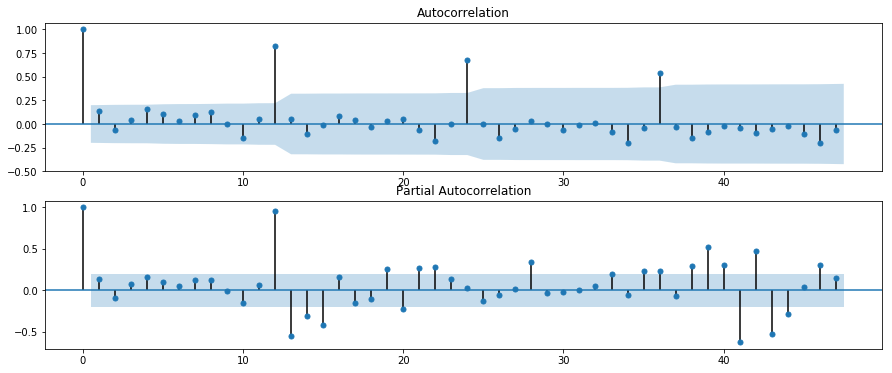

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 47 # play with this parameter

# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.

fig, ax = plt.subplots(2,1, figsize = (15,6))

plot_acf(y, lags = nlags, ax=ax[0])
plot_pacf(y, lags = nlags, method="ols", ax=ax[1])
plt.show()


                                     SARIMAX Results                                      
Dep. Variable:                 SALES (millions $)   No. Observations:                   97
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -653.814
Date:                            Sat, 09 Oct 2021   AIC                           1309.628
Time:                                    14:39:13   BIC                           1312.059
Sample:                                         0   HQIC                          1310.605
                                             - 97                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.365e+05   4.67e+04      7.200      0.000    2.45e+05    4.28e+05
Ljung-Box (L1) (Q):                

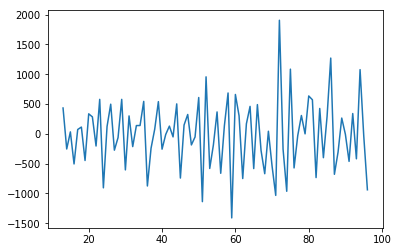

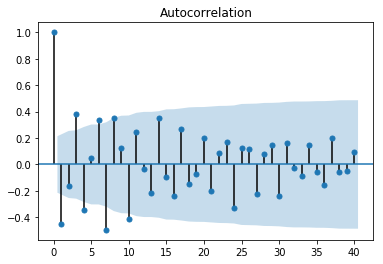

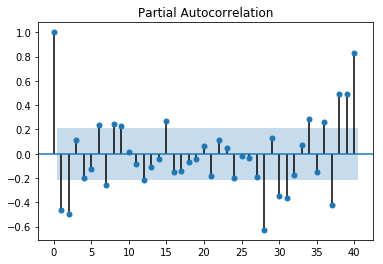

In [17]:
s = 12

fit = SARIMAX(endog = y, order = (0,1,0), seasonal_order = (0,1,0,s)).fit()
print(fit.summary())
residuos = fit.resid[13:]

nlags=40

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, method="ols",lags = nlags)
plt.show()

In [12]:
d = ndiffs(residuos, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(residuos, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

Regular differences:  0
Seasonal differences: 0


Ljung-Box: Statistic value [43.32170121] p-value [0.18730119]
Shapido: Statistic value 0.9891989231109619 p-value 0.7154272794723511


C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


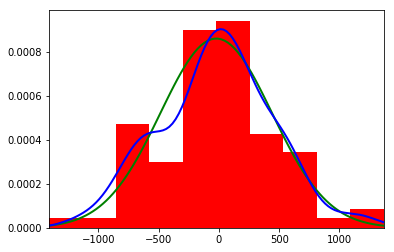

In [15]:
# Box test
import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[36])

print("Ljung-Box: Statistic value", box_test[0], "p-value", box_test[1]) 

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido: Statistic value", saphiro[0],"p-value",saphiro[1]) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

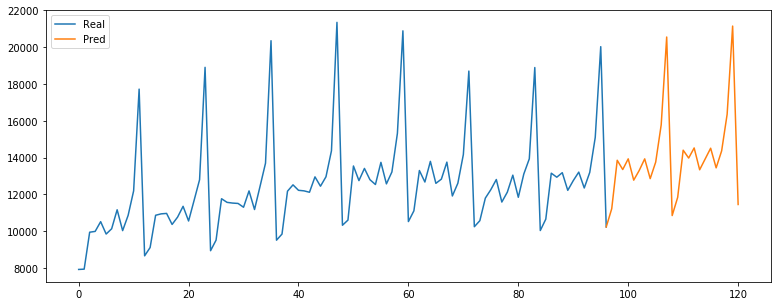

In [16]:
# Pintamos las siguientes 24 predicciones
y_pred = fit.forecast(steps = 24)

# Ponemos el último índice real
y_pred.loc[len(y)-1] = y[len(y)-1]

# Reseteamos los índices, ordenamos por índice y volvemos a poner el índice como índice de la Serie.
y_pred = y_pred.reset_index().sort_values(by = 'index').set_index('index')

# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
# print(y_pred)
plt.figure(figsize = (13,5))
plt.plot(y, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.legend()
plt.show()